In [51]:
import numpy as np

eigenvalue=np.load('eigenvalue_4096.npy')
eigenvector=np.load('eigenvector_4096.npy')

In [52]:
def broadening(omega1, omega2, sigma):
    delta=1.0/np.pi*sigma/((omega1-omega2)**2+sigma*sigma)
    return delta

In [53]:
Gmin=2*np.pi/44
Gmin

0.14279966607226333

In [54]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
nmodes=len(eigenvalue)
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=0
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_THz
        omega.append(val)

In [55]:
len(omega)

12288

In [56]:
np.max(np.array(omega))

18.88940909665957

In [57]:
k=np.array([1.8,0.0,0.0])
from ase.io import read
atoms=read('/home/emi/lammps/aSi-4096/optimized.data',format='lammps-data',style='atomic')
natom=len(atoms.positions)

In [58]:
eigenvector[:,0].shape

(12288,)

In [59]:
#evaluate Fourier component
#100 direction
import numpy as np
def get_C(eigenvector, position, k_vector):
    unit_vector=k_vector/np.linalg.norm(k_vector)
    disp=np.reshape(eigenvector,(natom,3))

    polalization_L=np.dot(unit_vector, disp.T)
    
    array_unit_vector=np.repeat(unit_vector.reshape(1,3),natom,axis=0)
    polalization_T=np.cross(array_unit_vector,disp) 
    phase=np.exp(1.0j*np.dot(k_vector, position.T))

    return np.linalg.norm(np.dot(polalization_L, phase))**2, np.linalg.norm(np.dot(polalization_T.T, phase))**2

In [60]:
id=800
E=omega[id]
position=atoms.positions
ev=eigenvector[:,id]

kvec=np.linspace(0.1,1.9,100)
C_T=[]
C_L=[]
for k in kvec:
    k_vector=[k,0,0]
    unit_vector=[1.0,0.0,0.0]
    cl, ct=get_C(eigenvector=ev,position=position, k_vector=k_vector)
    C_L.append(cl)
    C_T.append(ct)


#THz and meV
E, E*4.13567

(3.441379086370923, 14.232408246131635)

In [61]:
disp=np.reshape(ev,(natom,3))
disp.shape
uv=np.repeat(np.array(unit_vector).reshape(1,3),natom,axis=0)
np.cross(uv,disp)

array([[ 0.        ,  0.00040622, -0.00954519],
       [ 0.        , -0.00211555, -0.00168661],
       [ 0.        ,  0.01390916, -0.005147  ],
       ...,
       [-0.        ,  0.00131056,  0.0062524 ],
       [ 0.        , -0.00698246, -0.00612409],
       [ 0.        ,  0.00254343, -0.00653006]])

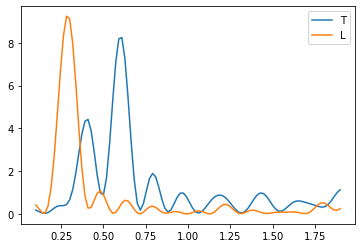

In [62]:
import matplotlib.pyplot as plt
plt.plot(kvec,C_T,label='T')
plt.plot(kvec,C_L,label='L')
plt.legend()


In [63]:
def polar_coord_sampling(n_sample,diameter):
    theta=np.linspace(0,np.pi,n_sample,endpoint=False)
    phi=np.linspace(0,2.0*np.pi,n_sample,endpoint=False)
    x=np.array([[diameter*np.sin(t)*np.cos(p) for t in theta] for p in phi]).flatten()
    y=np.array([[diameter*np.sin(t)*np.sin(p) for t in theta] for p in phi]).flatten()
    z=np.array([[diameter*np.cos(t) for t in theta] for p in phi]).flatten()

    return np.stack([x,y,z],axis=1)

In [72]:
id=2400
n_sample=10
E=omega[id]
position=atoms.positions
ev=eigenvector[:,id]

kvec=np.linspace(0.1,1.9,100)
C_L=[]
C_T=[]
for k in kvec:
    k_vector=polar_coord_sampling(n_sample,k)
    tmp_L=np.zeros(n_sample*n_sample)
    tmp_T=np.zeros(n_sample*n_sample)
    for i,vec in enumerate(k_vector):

        unit_vector_L=vec/np.linalg.norm(vec)
        tmp_L[i], tmp_T[i]=get_C(ev,position,vec)
    C_L.append(np.mean(tmp_L))
    C_T.append(np.mean(tmp_T))

#THz and meV
E, E*4.13567

(5.118068644089378, 21.16664294930112)

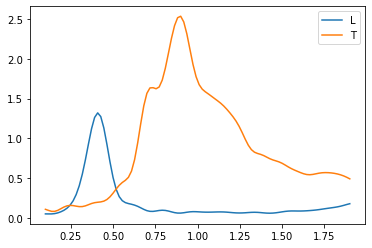

In [73]:
import matplotlib.pyplot as plt
plt.plot(kvec,C_L,label='L')
plt.plot(kvec,C_T,label='T')
plt.legend()